# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [32]:
#DATA_FOLDER = '../../02 - Intro to Pandas/Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.
DATA_FOLDER = '../../ADA2017-Tutorials/02 - Intro to Pandas/Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

In [298]:
#all imports
import seaborn as sns
import pandas as pd
import glob
import re

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [34]:
# Write your answer here

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [35]:
def merge_xls_files(regex):
    all_data = pd.DataFrame()
    list_ = glob.glob(regex)
    for f in list_:
        df = pd.read_excel(f,names = ["MICROBIOME", "DATA"])
        # added the origin. It will be usefull to add the metadata from the 10th spreadshee
        df['BARCODE']=re.search('MID[1-9]', f).group()
        all_data = all_data.append(df)
    return all_data

We import the 9 MID files

In [36]:
mid = merge_xls_files(DATA_FOLDER+'/microbiome/MID*.xls')
mid.head(10)

,MICROBIOME,DATA,BARCODE
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID1
1,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,MID1
2,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,MID1
3,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,MID1
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1
5,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1
6,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1
7,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1
8,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1,MID1
9,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",4,MID1


We import the metadata and fill the NaN values with unknown

In [37]:
metadata = pd.read_excel(DATA_FOLDER+'/microbiome/metadata.xls')
metadata = metadata.fillna('unknown')
metadata.head(10)

,BARCODE,GROUP,SAMPLE
0,MID1,EXTRACTION CONTROL,unknown
1,MID2,NEC 1,tissue
2,MID3,Control 1,tissue
3,MID4,NEC 2,tissue
4,MID5,Control 2,tissue
5,MID6,NEC 1,stool
6,MID7,Control 1,stool
7,MID8,NEC 2,stool
8,MID9,Control 2,stool


We merge the 2 datasets on the BARCODE

In [38]:
df = pd.DataFrame()
df = pd.merge(mid, metadata,on='BARCODE')
df.head(10)

,MICROBIOME,DATA,BARCODE,GROUP,SAMPLE
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID1,EXTRACTION CONTROL,unknown
1,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,MID1,EXTRACTION CONTROL,unknown
2,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,MID1,EXTRACTION CONTROL,unknown
3,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,MID1,EXTRACTION CONTROL,unknown
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1,EXTRACTION CONTROL,unknown
5,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1,EXTRACTION CONTROL,unknown
6,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1,EXTRACTION CONTROL,unknown
7,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1,EXTRACTION CONTROL,unknown
8,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1,MID1,EXTRACTION CONTROL,unknown
9,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",4,MID1,EXTRACTION CONTROL,unknown


Then we drop the BARCODE colunm because it is not usefull anymore

In [39]:
df = df.drop('BARCODE', 1)

We pivot the table to have MICROBIOME in index and have the GROUP and SAMPLE in colunm. We also replace all the NaN values by the tag unknown.

In [40]:
df = df.pivot_table('DATA','MICROBIOME',['GROUP','SAMPLE'],fill_value='unnkown')
df.head(10)

GROUP                                              Control 1           \
SAMPLE                                                 stool   tissue   
MICROBIOME                                                              
Archaea "Crenarchaeota" Thermoprotei Acidilobal...   unnkown       15   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...         8       14   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...   unnkown  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...         2        4   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...   unnkown        1   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...         1        1   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...   unnkown  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...         1        3   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...         1  unnkown   
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...         5        4   

GROUP                                              Control 2           \
SAMPLE                                                 stool   tissue   
MICROBIOME                                                              
Archaea "Crenarchaeota" Thermoprotei Acidilobal...   unnkown       26   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        16       28   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...   unnkown        1   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...         2        5   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...   unnkown  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...   unnkown        2   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...   unnkown  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...         5        2   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...   unnkown        3   
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...         6       14   

GROUP                                              EXTRACTION CONTROL  \
SAMPLE                                                        unknown   
MICROBIOME                                                              
Archaea "Crenarchaeota" Thermoprotei Acidilobal...            unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...                  2   
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...                  3   

GROUP                                                 NEC 1             NEC 2  \
SAMPLE                                                stool   tissue    stool   
MICROBIOME                                                                      
Archaea "Crenarchaeota" Thermoprotei Acidilobal...  unnkown       14  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unnkown       23  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unnkown  unnkown  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        1        1  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unnkown  unnkown  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unnkown        2  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unnkown        1  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        1  unnkown  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        2        2  unnkown   
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...        5       10  unnkown   

GROUP                                                        
SAMPLE                            

Now we check if the index is unique

In [41]:
df.index.is_unique

True

Alright, everithing is great

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [228]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

### Answer :

* Import the needed libraries and data from titanic.xls using pandas in a data frame called `passengers`

In [325]:
import matplotlib.pylab as plt 
import numpy as np
import seaborn as sns
import pandas as pd
import re

%matplotlib inline

passengers = pd.DataFrame()
passengers = pd.read_excel(DATA_FOLDER + '/titanic.xls')

* **Describe the type and the value range of each attribute. Indicate and transform the attributes that can be `Categorical`.**

In [326]:
passengers.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [327]:
passengers.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Based from the observations of the types and value of the attributes of the dataframe `passengers`, we can convert the attibute `body` to an integer. We need to fill the NaN values first.

In [328]:
passengers.body = passengers.body.fillna("0")
passengers.body = passengers.body.astype(int)

Transform `sex`, `pclass`,`embarked` and `survived` atibutes to `Categorical` attibutes : 

In [329]:
passengers.sex  = passengers.sex.astype('category')
passengers.pclass  = passengers.pclass.astype('category')
passengers.embarked = passengers.embarked.astype('category')

* **Plot histograms for the travel class, embarkation port, sex and age attributes. For the latter one, use discrete decade intervals.**

A bar chart is the best way of representing categorical data. Regarding the age of the passengers, we will represent it in a histogram since it gives a discretized display of value frequency which is more suitable to represent non-categorical data.

First, let's define a function to display a bar plot. We will reuse the same function to plot the `travel class`,`embarkation port` and `sex`.

In [330]:
def bar_plot(xlbl, data, n):
    fig, ax = plt.subplots()
    ax.set_title( xlbl, fontsize=15, fontweight='bold')
    sns.barplot(data[:n].keys(), data[:n], ax=ax)
    locs, labels = plt.xticks()
    plt.setp(labels,rotation=0)    

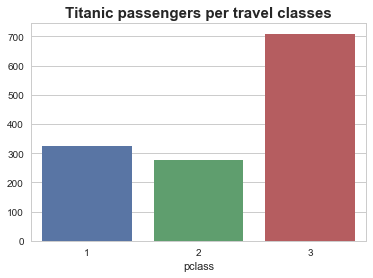

In [331]:
bar_plot('Titanic passengers per travel classes', passengers.groupby('pclass').size(), len(passengers.groupby('pclass')))    

This bar chart tells us that the passengers in class 3 are almost equal to the numbers of passengers travelling in classes 1 and 2 combined.

Now, let's plot a bar chart of the number of passengers having embarked in the diferents ports :

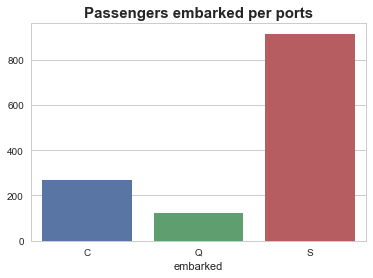

In [332]:
bar_plot('Passengers embarked per ports', passengers.groupby('embarked').size(), len(passengers.groupby('embarked')))    

We can clearly see in this bar char that a large portion of the passengers have embarked from the port of Southhampton.


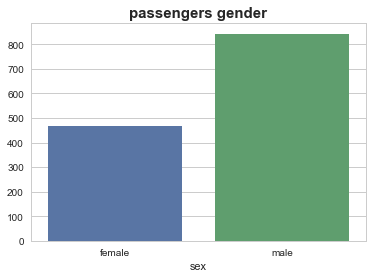

In [333]:
bar_plot('passengers gender', passengers.groupby('sex').size(), len(passengers.groupby('sex')))

The major portion of the passergers of the Titanic where men. We could see it even more clearer in a stacked bar chart.

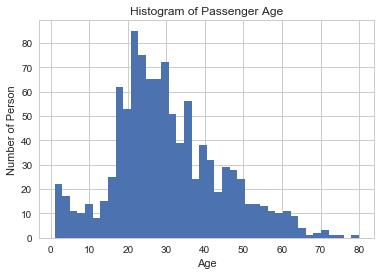

In [334]:
passengers.loc[passengers['age']<1,'age'] = None

passengers.age.hist(bins=40)
plt.xlabel("Age")
plt.ylabel("Number of Person")
plt.title("Histogram of Passenger Age");
plt.show()

We choose bins=40 because we can see from the describtion of the dataframe that the age max is 80 years old, so the discret intervals will perfectily fit to the edge of the histogram.

This histogram have an almost normal distribution. The earlier statistics show that median is 28 year old, and mean is 30 year old. You can also tell that the distribution is normal when you have similar median and mean.

Overall the plot tells us that the passengers' age is distributed around mid-end 20's.

* **Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.**

In [335]:
def string_to_floor(x):
    x=re.sub('[^a-zA-Z]+', '',x)
    x=x[-1]
    
    floor_list=['A','B','C','D','E','F']
    
    if (x in  floor_list):
        return x
    else:
        return None

In [336]:
passengers.cabin = passengers.cabin.fillna('Unknown')
passengers.floor = passengers.cabin.apply(lambda x : string_to_floor(x))
passengers.floor = passengers.floor.astype('category')

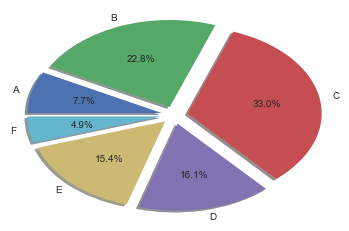

In [337]:
explode = [0.1]*6
labels = passengers.floor.value_counts().sort_index().index.categories

fig1, ax1 = plt.subplots()
ax1.pie(passengers.floor.value_counts().sort_index(), 
        explode=explode,
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, startangle=180,counterclock=False)

plt.show()

* **For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.**

In [338]:
passengers_first = passengers[(passengers['pclass'] == 1)]
passengers_second = passengers[(passengers['pclass'] == 2)]
passengers_third = passengers[(passengers['pclass'] == 3)]

survivors = pd.DataFrame([ passengers_first.survived.value_counts(),
                            passengers_second.survived.value_counts(),
                            passengers_third.survived.value_counts() ], 
                        index=[1,2,3])
survivors.index.names = ['Class']
survivors.columns.names = ['Survived']
survivors

Survived,0,1
Class,,
1,123,200
2,158,119
3,528,181


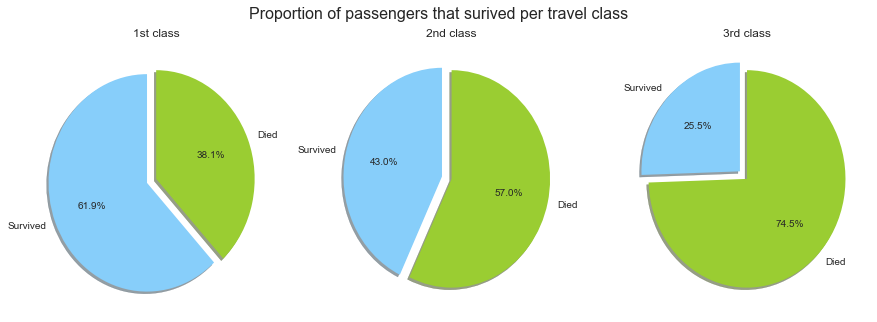

In [339]:
def pie_chart(data, subplot, title):
    ax = subplot
    ax.pie( data, explode = (0, 0.1), shadow = True,
           autopct = '%1.1f%%',
           labels = labels,
           colors = colors,
         startangle=90, counterclock=False)
    plt.title(title)
    
    
fig = plt.figure(figsize=(15,5))
labels = ['Died', 'Survived']
colors = ['yellowgreen', 'lightskyblue']

pie_chart(survivors.loc[1,], plt.subplot(1,3,1), '1st class')
pie_chart(survivors.loc[2,], plt.subplot(1,3,2), '2nd class')
pie_chart(survivors.loc[3,], plt.subplot(1,3,3), '3rd class')

fig.suptitle('Proportion of passengers that surived per travel class', fontsize=16)
plt.show()

Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.

In [340]:
survivor_by_travel_and_sex = passengers[['pclass','sex','survived']].groupby(['pclass','sex']).mean().reset_index()
survivor_by_travel_and_sex['survived'] = survivor_by_travel_and_sex['survived']*100
survivor_by_travel_and_sex

,pclass,sex,survived
0,1,female,96.527778
1,1,male,34.078212
2,2,female,88.679245
3,2,male,14.619883
4,3,female,49.074074
5,3,male,15.212982


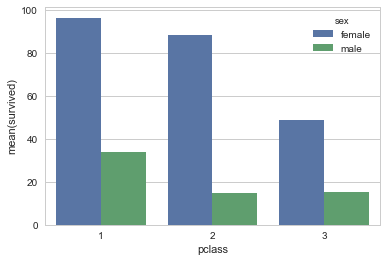

In [341]:
sns.barplot(x="pclass", y="survived", hue="sex", data=survivor_by_travel_and_sex);

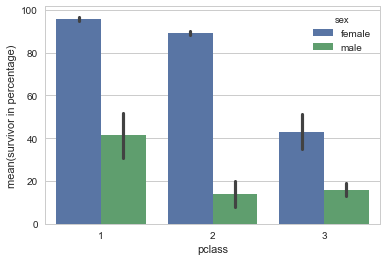

In [342]:
import seaborn as sns
#We reset the index to plot
percentage_survivor_by_class_and_sex = percentage_survivor_by_class_and_sex.reset_index()

sns.barplot(x="pclass", y="survivor in percentage", hue="sex", data=percentage_survivor_by_class_and_sex);

* Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index

In [343]:
median_age=passengers.age.median()

def old_or_young(age,median_age):
    if age <median_age:
        return 'young'
    elif  age >= median_age:
        return 'old'
    else:
        return None


passengers['age_category']= passengers.age.apply(lambda x : old_or_young(x,median_age))
passengers.age_category  = passengers.age_category.astype('category')

In [344]:
survivor_by_travel_and_sex_and_age = passengers[['pclass','age_category','sex','survived']].groupby(['pclass','age_category','sex']).mean().reset_index()
survivor_by_travel_and_sex_and_age['survived'] = survivor_by_travel_and_sex_and_age['survived']*100
survivor_by_travel_and_sex_and_age

,pclass,age_category,sex,survived
0,1,old,female,96.774194
1,1,old,male,30.894309
2,1,young,female,95.000000
3,1,young,male,51.851852
4,2,old,female,88.461538
5,2,old,male,7.777778
6,2,young,female,90.000000
7,2,young,male,20.000000
8,3,old,female,34.782609
9,3,old,male,13.043478


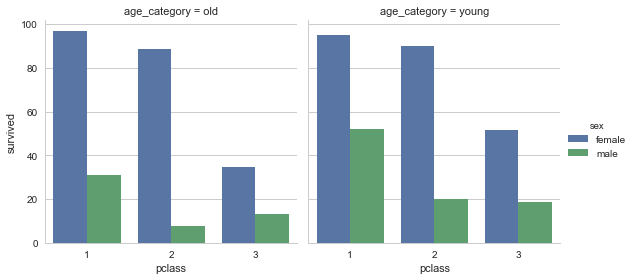

In [345]:
sns.factorplot(x="pclass", y="survived", hue="sex",col="age_category",kind='bar', data=survivor_by_travel_and_sex_and_age);